# <center> **–ê–Ω–∞–ª–∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ A/B-—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è**

## **–ö—Ä–∞—Ç–∫–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ**

**–í –¥–∞–Ω–Ω–æ–º –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–∏ –ø—Ä–æ–≤–æ–¥–∏—Ç—Å—è –æ—Ü–µ–Ω–∫–∞ –≤–ª–∏—è–Ω–∏—è –Ω–æ–≤–æ–≥–æ –ø—Ä–æ–¥—É–∫—Ç–∞ –Ω–∞ –∫–æ–Ω–≤–µ—Ä—Å–∏—é –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –æ–ø–ª–∞—Ç—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–º –ø–µ—Ä–≤–æ–π —Å–µ—Å—Å–∏–∏ —Å –ø—Å–∏—Ö–æ–ª–æ–≥–æ–º –ê–ª—å—Ç–µ—Ä (ga:goal18Completions).**

## **–û–ø—Ä–µ–¥–µ–ª—è–µ–º –º–µ—Ç—Ä–∏–∫—É**

**–û—Ü–µ–Ω–∏–≤–∞–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫—É—é –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –∏–∑–º–µ–Ω–µ–Ω–∏—è –∫–æ–Ω–≤–µ—Ä—Å–∏–∏.**

### **–ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏**

In [4]:
import pandas as pd # —Ä–∞–±–æ—Ç–∞ —Å —Ç–∞–±–ª–∏—Ü–∞–º–∏
import numpy as np # –ª–∏–Ω–µ–π–Ω–∞—è –∞–ª–≥–µ–±—Ä–∞
import seaborn as sns # –≥—Ä–∞—Ñ–∏–∫–∏ –∏ –¥–∏–∞–≥—Ä–∞–º–º—ã
import matplotlib.pyplot as plt # –≥—Ä–∞—Ñ–∏–∫–∏ –∏ –¥–∏–∞–≥—Ä–∞–º–º—ã
from statsmodels.stats.proportion import proportions_ztest # —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ —Ç–µ—Å—Ç—ã
from scipy.stats import norm # —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞

**–ü—Ä–æ—á–∏—Ç–∞–µ–º –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ**

In [5]:
ab_test = pd.read_csv('data/NovayaAnketa2022.csv')
ab_test.head()

Variant  Date Hour and Minute       Source / Medium    City  Users  \
0        0          202210131452  yandex.ru / referral  Moscow      1   
1        0          202210131453      google / organic   Sochi      1   
2        0          202210131454          google / cpc    Brno      1   
3        0          202210131455          google / cpc    Brno      1   
4        0          202210131455      google / organic  Moscow      1   

   New Users  ga:goal11Completions  ga:goal12Completions  ga:goal18Completions  
0          1                     0                     0                     0  
1          1                     0                     0                     0  
2          1                     0                     0                     0  
3          0                     0                     0                     0  
4          0                     0                     0                     0

In [6]:
def optimize_users(df, users_col, goal_col):
    new_rows = []
    for index, row in df.iterrows():
        for i in range(row[users_col]):
            if i < row[goal_col]:
                new_row = row.copy()
                new_row[users_col] = 1
                new_row[goal_col] = 1
                new_rows.append(new_row)
            else:
                new_row = row.copy()
                new_row[users_col] = 1
                new_row[goal_col] = 0
                new_rows.append(new_row)
    new_df = pd.DataFrame(new_rows, )
    return new_df.reset_index(drop=True)

ab_test = optimize_users(ab_test, 'Users', 'ga:goal18Completions')

**–ü—Ä–∏–≤–µ–¥–µ–º —Å—Ç–æ–ª–±–µ—Ü Date Hour and Minute –∫ —Ñ–æ—Ä–º–∞—Ç—É to_datetime –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –¥–∞—Ç–∞–º–∏, –∞ —Ç–∞–∫–∂–µ —Å–æ–∑–¥–∞–¥–∏–º –æ—Ç–¥–µ–ª—å–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü —Å –¥–∞—Ç–æ–π**

In [7]:
ab_test['Date Hour and Minute'] = pd.to_datetime(
    ab_test['Date Hour and Minute'], 
    format='%Y%m%d%H%M'
    )
ab_test['date'] = pd.to_datetime(
    ab_test['Date Hour and Minute']).dt.date

ab_test['Date Hour and Minute'].describe()

/tmp/ipykernel_5267/3421065071.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ab_test['Date Hour and Minute'].describe()


count                  231087
unique                  35304
top       2022-10-28 10:55:00
freq                       30
first     2022-10-13 14:52:00
last      2022-11-08 12:49:00
Name: Date Hour and Minute, dtype: object

In [35]:
(ab_test[ab_test['Variant'] == 0]['date'].min() - ab_test[ab_test['Variant'] == 1]['date'].min()).days

0

**–£–±–µ–¥–∏–º—Å—è, —á—Ç–æ —Å—Ä–æ–∫–∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è –ê/–ë —Ç–µ—Å—Ç–∞ –æ–¥–∏–Ω–∞–∫–æ–≤—ã –¥–ª—è –∫–∞–∂–¥–æ–π –≥—Ä—É–ø–ø—ã**

In [8]:
data_grouped = ab_test.groupby('Variant')['date'].agg(['min', 'max'])
data_grouped

min         max
Variant                        
0        2022-10-13  2022-11-08
1        2022-10-13  2022-11-08

**–í—Å–µ –≤–µ—Ä–Ω–æ. –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–æ–≤–æ–¥–∏–ª–æ—Å—å —Å 13 –æ–∫—Ç—è–±—Ä—è –ø–æ 8 –Ω–æ—è–±—Ä—è 2022 –≥–æ–¥–∞, —Ç.–µ –ø–æ—á—Ç–∏ 4 –Ω–µ–¥–µ–ª–∏.**

**–í —Å—Ç–æ–ª–±—Ü–µ Users —É–∫–∞–∑–∞–Ω–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –∑–∞—à–ª–∏ –Ω–∞ —Å–∞–π—Ç –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—É—é –º–∏–Ω—É—Ç—É —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞. –î–ª—è —á–∏—Å—Ç–æ—Ç—ã –∞–Ω–∞–ª–∏–∑–∞ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ –∑–∞–ø–∏—Å–∏ c 1 –∫–ª–∏–µ–Ω—Ç–æ–º. –û–Ω–∏ —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç 96% –¥–∞–Ω–Ω—ã—Ö, –æ—Å—Ç–∞–ª—å–Ω—ã–µ —É–¥–∞–ª–∏–º.**

In [9]:
ab_test['Users'].value_counts(normalize=True)

1    1.0
Name: Users, dtype: float64

In [10]:
ab_test = ab_test[ab_test['Users'] == 1]
ab_test.shape

(231087, 10)

**–°—Ç–æ–ª–±—Ü—ã 'Source / Medium' –∏ 'City' –Ω–∞–º —Ç–∞–∫–∂–µ –Ω–µ –ø—Ä–∏–≥–æ–¥—è—Ç—Å—è**

In [11]:
ab_test = ab_test.drop(columns=['Source / Medium', 'City'])
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231087 entries, 0 to 231086
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Variant               231087 non-null  int64         
 1   Date Hour and Minute  231087 non-null  datetime64[ns]
 2   Users                 231087 non-null  int64         
 3   New Users             231087 non-null  int64         
 4   ga:goal11Completions  231087 non-null  int64         
 5   ga:goal12Completions  231087 non-null  int64         
 6   ga:goal18Completions  231087 non-null  int64         
 7   date                  231087 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 15.9+ MB


**–ü—Ä–æ–≤–µ–¥–µ–º –±–∞–∑–æ–≤—ã–π –∞–Ω–∞–ª–∏–∑ —Ç–µ—Å—Ç–∞**

In [12]:
ab_test.describe()

Variant     Users      New Users  ga:goal11Completions  \
count  231087.000000  231087.0  231087.000000         231087.000000   
mean        0.496969       1.0       0.164579              0.028738   
std         0.499992       0.0       0.386492              0.167819   
min         0.000000       1.0       0.000000              0.000000   
25%         0.000000       1.0       0.000000              0.000000   
50%         0.000000       1.0       0.000000              0.000000   
75%         1.000000       1.0       0.000000              0.000000   
max         1.000000       1.0       9.000000              2.000000   

       ga:goal12Completions  ga:goal18Completions  
count         231087.000000         231087.000000  
mean               0.084752              0.006002  
std                0.282232              0.077240  
min                0.000000              0.000000  
25%                0.000000              0.000000  
50%                0.000000              0.000000  
75%                0.000000              0.000000  
max                3.000000              1.000000

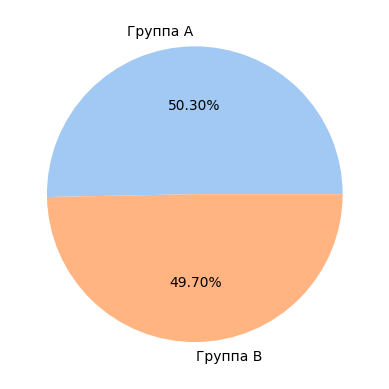

In [43]:
values = [ab_test[ab_test['Variant'] == 0].shape[0], ab_test[ab_test['Variant'] == 1].shape[0]]
colors = sns.color_palette('pastel')
#create pie chart
plt.pie(values, labels=['–ì—Ä—É–ø–ø–∞ –ê', '–ì—Ä—É–ø–ø–∞ –í'], colors = colors, autopct='%.2f%%')
plt.show()
    

**–ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π –∏ –æ–ø–ª–∞—Ç –±—ã–ª–æ —Å–æ–≤–µ—Ä—à–µ–Ω–æ –≤ –∫–∞–∂–¥–æ–π –≥—Ä—É–ø–ø–µ.**

In [13]:
data_grouped = ab_test.groupby('Variant').agg({
    'Users':'count',
    'ga:goal18Completions':'sum'
}).reset_index().rename(columns={
    'Users': 'count_visits',
    'ga:goal18Completions': 'count_purchases'
})
data_grouped

Variant  count_visits  count_purchases
0        0        116244              682
1        1        114843              705

**–î–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü —Å –∫–æ–Ω–≤–µ—Ä—Å–∏–µ–π**

In [14]:
data_grouped['conversion'] = data_grouped['count_purchases'] / data_grouped['count_visits'] * 100
data_grouped

Variant  count_visits  count_purchases  conversion
0        0        116244              682    0.586697
1        1        114843              705    0.613882

**–ü–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –æ—á–µ–Ω—å –±–ª–∏–∑–∫–∏. –î–ª—è –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø –∫–æ–Ω–≤–µ—Ä—Å–∏—è —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ 0,6%**

**–¢–µ–ø–µ—Ä—å –æ—Ü–µ–Ω–∏–º —Å—Ç–∞–±–∏–ª–∏–∑–∞—Ü–∏—é –∫—É–º—É–ª—è—Ç–∏–≤–Ω—ã—Ö –º–µ—Ç—Ä–∏–∫ –≤–æ –≤—Ä–µ–º–µ–Ω–∏.**

In [15]:
data_grouped_cum = ab_test.groupby(['date', 'Variant']).agg({
    'Users':'count',
    'ga:goal18Completions':'sum'
}).reset_index().rename(columns={
    'Users': 'count_visits',
    'ga:goal18Completions': 'count_purchases'
})
data_grouped_cum['conversion'] = data_grouped_cum['count_purchases'] / data_grouped_cum['count_visits'] * 100
data_grouped_cum['cum_count_visits'] = data_grouped_cum.groupby(
    ['Variant'])['count_visits'].cumsum()
data_grouped_cum['cum_count_purchases'] = data_grouped_cum.groupby(
    ['Variant'])['count_purchases'].cumsum()
data_grouped_cum['cum_conversion'] = data_grouped_cum['cum_count_purchases'] / data_grouped_cum['cum_count_visits'] * 100

data_grouped_cum.head()

date  Variant  count_visits  count_purchases  conversion  \
0  2022-10-13        0          2451               13    0.530396   
1  2022-10-13        1          2481               19    0.765820   
2  2022-10-14        0          4206               25    0.594389   
3  2022-10-14        1          4303               31    0.720428   
4  2022-10-15        0          3767               10    0.265463   

   cum_count_visits  cum_count_purchases  cum_conversion  
0              2451                   13        0.530396  
1              2481                   19        0.765820  
2              6657                   38        0.570828  
3              6784                   50        0.737028  
4             10424                   48        0.460476

**–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –∏–∑–º–µ–Ω–µ–Ω–∏–µ –∫—É–º—É–ª—è—Ç–∏–≤–Ω–æ–π –º–µ—Ç—Ä–∏–∫–∏**

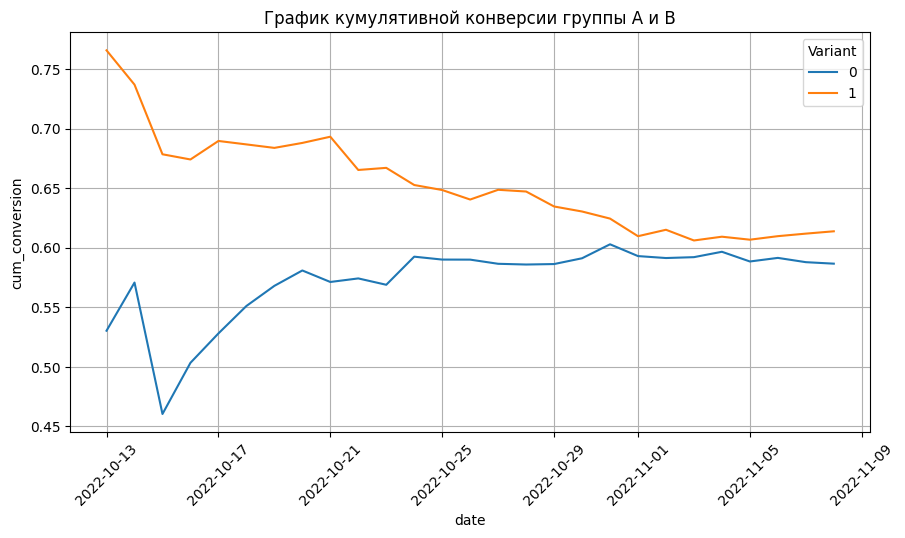

In [16]:
fig = plt.figure(figsize=[8, 4])
ax = fig.add_axes([1, 1, 1, 1])
sns.lineplot(
    data=data_grouped_cum,
    x='date',
    y='cum_conversion',
    hue='Variant',
    ax=ax
)
ax.set_title('–ì—Ä–∞—Ñ–∏–∫ –∫—É–º—É–ª—è—Ç–∏–≤–Ω–æ–π –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ –≥—Ä—É–ø–ø—ã –ê –∏ –í')
ax.xaxis.set_tick_params(rotation=45)
ax.grid(True);

**–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –≤ –≥—Ä—É–ø–ø–µ –í(1) –º–µ—Ç—Ä–∏–∫–∞ –≤ –Ω–∞—á–∞–ª–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –≤—ã—à–µ, —á–µ–º –≤ –≥—Ä—É–ø–ø–µ –ê(0), –æ–¥–Ω–∞–∫–æ, –ø–æ—Å–ª–µ 1 –Ω–æ—è–±—Ä—è –∫–æ–Ω–≤–µ—Ä—Å–∏—è –¥–ª—è –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø —Å—Ä–∞–≤–Ω—è–ª–∞—Å—å.**


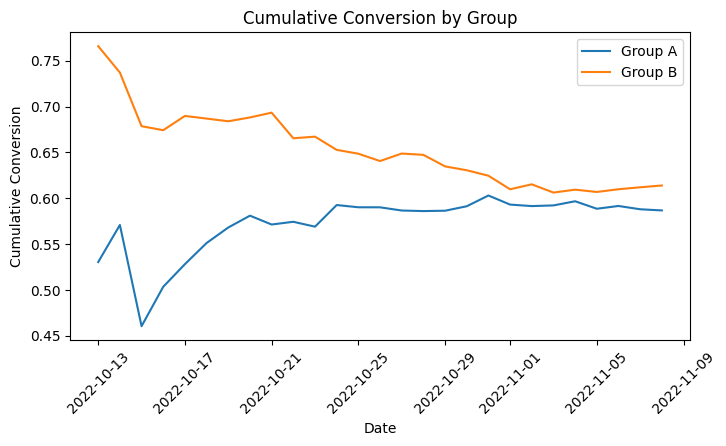

**–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –≤ –≥—Ä—É–ø–ø–µ –í(1) –º–µ—Ç—Ä–∏–∫–∞ –≤ –Ω–∞—á–∞–ª–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –≤—ã—à–µ, —á–µ–º –≤ –≥—Ä—É–ø–ø–µ –ê(0), –æ–¥–Ω–∞–∫–æ, –ø–æ—Å–ª–µ 1 –Ω–æ—è–±—Ä—è –∫–æ–Ω–≤–µ—Ä—Å–∏—è –¥–ª—è –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø —Å—Ä–∞–≤–Ω—è–ª–∞—Å—å.**


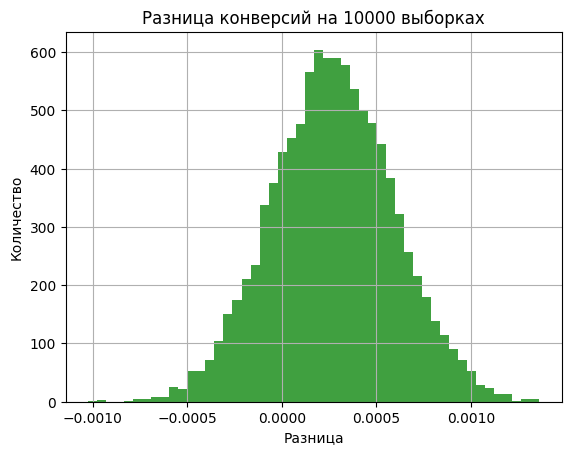

In [55]:
print('**–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –≤ –≥—Ä—É–ø–ø–µ –í(1) –º–µ—Ç—Ä–∏–∫–∞ –≤ –Ω–∞—á–∞–ª–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –≤—ã—à–µ, —á–µ–º –≤ –≥—Ä—É–ø–ø–µ –ê(0), –æ–¥–Ω–∞–∫–æ, –ø–æ—Å–ª–µ 1 –Ω–æ—è–±—Ä—è –∫–æ–Ω–≤–µ—Ä—Å–∏—è –¥–ª—è –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø —Å—Ä–∞–≤–Ω—è–ª–∞—Å—å.**')

fig, ax = plt.subplots(figsize=[8, 4])

# plot data for group A
ax.plot(data_grouped_cum[data_grouped_cum['Variant'] == 0]['date'], 
        data_grouped_cum[data_grouped_cum['Variant'] == 0]['cum_conversion'], 
        label='Group A')

# plot data for group B
ax.plot(data_grouped_cum[data_grouped_cum['Variant'] == 1]['date'], 
        data_grouped_cum[data_grouped_cum['Variant'] == 1]['cum_conversion'], 
        label='Group B')

# set title and axis labels
ax.set_title('Cumulative Conversion by Group')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Conversion')

# rotate x-axis labels and add legend
plt.xticks(rotation=45)
ax.legend()

# display plot
plt.show()

print('**–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –≤ –≥—Ä—É–ø–ø–µ –í(1) –º–µ—Ç—Ä–∏–∫–∞ –≤ –Ω–∞—á–∞–ª–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –≤—ã—à–µ, —á–µ–º –≤ –≥—Ä—É–ø–ø–µ –ê(0), –æ–¥–Ω–∞–∫–æ, –ø–æ—Å–ª–µ 1 –Ω–æ—è–±—Ä—è –∫–æ–Ω–≤–µ—Ä—Å–∏—è –¥–ª—è –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø —Å—Ä–∞–≤–Ω—è–ª–∞—Å—å.**')

plt.hist(x=conversion_diffs, bins=50, facecolor='g', alpha=0.75)
plt.grid(True)
plt.xlabel('–†–∞–∑–Ω–∏—Ü–∞')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.title('–†–∞–∑–Ω–∏—Ü–∞ –∫–æ–Ω–≤–µ—Ä—Å–∏–π –Ω–∞ 10000 –≤—ã–±–æ—Ä–∫–∞—Ö');


**–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –≤ –≥—Ä—É–ø–ø–µ –í(1) –º–µ—Ç—Ä–∏–∫–∞ –≤ –Ω–∞—á–∞–ª–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –≤—ã—à–µ, —á–µ–º –≤ –≥—Ä—É–ø–ø–µ –ê(0), –æ–¥–Ω–∞–∫–æ, –ø–æ—Å–ª–µ 1 –Ω–æ—è–±—Ä—è –∫–æ–Ω–≤–µ—Ä—Å–∏—è –¥–ª—è –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø —Å—Ä–∞–≤–Ω—è–ª–∞—Å—å.**

**–¢–µ–ø–µ—Ä—å –ø–µ—Ä–µ–π–¥–µ–º –∫ –ø—Ä–æ–≤–µ—Ä–∫–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –º–µ—Ç—Ä–∏–∫ –≤ –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø–∞—Ö. –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ —É—Å—Ç–∞–Ω–æ–≤–∏–º 0.05**

In [17]:
data_grouped

Variant  count_visits  count_purchases  conversion
0        0        116244              682    0.586697
1        1        114843              705    0.613882

In [18]:
# –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –∫–æ–Ω–≤–µ—Ä—Å–∏–π –º—ã –±—É–¥–µ–º 
# –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å z-–∫—Ä–∏—Ç–µ—Ä–∏–π –¥–ª—è –ø—Ä–æ–ø–æ—Ä—Ü–∏–π

H0 = '–ö–æ–Ω–≤–µ—Ä—Å–∏–∏ –≤ –≥—Ä—É–ø–ø–∞—Ö –ê –∏ B —Ä–∞–≤–Ω—ã'
H1 = '–ö–æ–Ω–≤–µ—Ä—Å–∏—è –≤ –≥—Ä—É–ø–ø–µ –ê –≤—ã—à–µ, —á–µ–º –∫–æ–Ω–≤–µ—Ä—Å–∏—è –≤ –≥—Ä—É–ø–ø–µ B'
alpha = 0.05

_, p_value = proportions_ztest(
    count=data_grouped['count_purchases'],
    nobs=data_grouped['count_visits'], 
    alternative='two-sided'
)

print('p-value: ', round(p_value, 2))
if (p_value < alpha): 
    print("–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. {}".format(H0))
    print("–ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞. H1: {}".format(H1))
else:
    print("–ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. {}".format(H0))

p-value:  0.4
–ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –ö–æ–Ω–≤–µ—Ä—Å–∏–∏ –≤ –≥—Ä—É–ø–ø–∞—Ö –ê –∏ B —Ä–∞–≤–Ω—ã


**–ü—Ä–æ–≤–µ–¥—è Z-—Ç–µ—Å—Ç, –º—ã –ø–æ–ª—É—á–∏–ª–∏ p-value —Ä–∞–≤–Ω–æ–µ 0.79. –¢–∞–∫ –∫–∞–∫  —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $\alpha$ = 0.05, —Ç–æ –º—ã –ø—Ä–∏–Ω—è–ª–∏ –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ç–æ–º, —á—Ç–æ –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ —Ä–∞–≤–Ω—ã. –ü–æ—ç—Ç–æ–º—É —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É –∫–æ–Ω–≤–µ—Ä—Å–∏—è–º–∏ –ê –∏ –í –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç**

**–¢–µ–ø–µ—Ä—å —É–±–µ–¥–∏–º—Å—è –≤ –ø—Ä–∞–≤–∏–ª—å–Ω–æ—Å—Ç–∏ –≤—ã–≤–æ–¥–æ–≤ –∏ –ø–æ—Å—Ç—Ä–æ–∏–º 95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª**

In [19]:
group_a = ab_test[ab_test['Variant'] == 0]
group_b = ab_test[ab_test['Variant'] == 1]

In [20]:
def z_mean_conf_interval(n, x_mean, x_std, gamma=0.95):
    alpha = 1 - gamma # —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏
    z_crit = -norm.ppf(alpha/2) # z –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ
    eps = z_crit * x_std / n**0.5 # –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å
    lower_bound = x_mean - eps # –ª–µ–≤–∞—è (–Ω–∏–∂–Ω—è—è) –≥—Ä–∞–Ω–∏—Ü–∞
    upper_bound = x_mean + eps # –ø—Ä–∞–≤–∞—è (–≤–µ—Ä—Ö–Ω—è—è) –≥—Ä–∞–Ω–∏—Ü–∞
    return lower_bound, upper_bound

lower_bound_a, upper_bound_a = z_mean_conf_interval(
    group_a.shape[0], 
    group_a['ga:goal18Completions'].mean(),
    group_a['ga:goal18Completions'].std()
    )
# –≤–æ–∑–≤—Ä–∞—â–∞–µ–º –∫–æ—Ä—Ç–µ–∂ –∏–∑ –æ–∫—Ä—É–≥–ª—ë–Ω–Ω—ã—Ö –≥—Ä–∞–Ω–∏—Ü –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ –¥–ª—è –≥—Ä—É–ø–ø—ã –ê
confidence_interval_a = (round(lower_bound_a, 4), round(upper_bound_a, 4))

lower_bound_b, upper_bound_b = z_mean_conf_interval(
    group_b.shape[0], 
    group_b['ga:goal18Completions'].mean(),
    group_b['ga:goal18Completions'].std()
    )
# –≤–æ–∑–≤—Ä–∞—â–∞–µ–º –∫–æ—Ä—Ç–µ–∂ –∏–∑ –æ–∫—Ä—É–≥–ª—ë–Ω–Ω—ã—Ö –≥—Ä–∞–Ω–∏—Ü –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ –¥–ª—è –≥—Ä—É–ø–ø—ã –í
confidence_interval_b = (round(lower_bound_b, 4), round(upper_bound_b, 4))

print(f'–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –≥—Ä—É–ø–ø—ã –ê: {confidence_interval_a}')
print(f'–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –≥—Ä—É–ø–ø—ã B: {confidence_interval_b}')

–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –≥—Ä—É–ø–ø—ã –ê: (0.0054, 0.0063)
–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –≥—Ä—É–ø–ø—ã B: (0.0057, 0.0066)


**–¢–∞–∫–∂–µ –ø–æ—Å—Ç—Ä–æ–∏–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–æ—Å—Ç–∏ –∫–æ–Ω–≤–µ—Ä—Å–∏–π**


In [21]:
def diff_proportions_conf_interval(n, x_p, gamma=0.95):
    alpha = 1 - gamma # —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏
    diff = x_p[1] - x_p[0] # –≤—ã–±–æ—Ä–æ—á–Ω–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ –∫–æ–Ω–≤–µ—Ä—Å–∏–π –≥—Ä—É–ø–ø B –∏ A
    z_crit = -norm.ppf(alpha/2) # z –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ
    eps = z_crit * (x_p[0] * (1 - x_p[0])/n[0] + x_p[1] * (1 - x_p[1])/n[1]) ** 0.5 # –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å
    lower_bound = diff - eps # –ª–µ–≤–∞—è (–Ω–∏–∂–Ω—è—è) –≥—Ä–∞–Ω–∏—Ü–∞
    upper_bound = diff + eps # –ø—Ä–∞–≤–∞—è (–≤–µ—Ä—Ö–Ω—è—è) –≥—Ä–∞–Ω–∏—Ü–∞
    # –≤–æ–∑–≤—Ä–∞—â–∞–µ–º –∫–æ—Ä—Ç–µ–∂ –∏–∑ –æ–∫—Ä—É–≥–ª—ë–Ω–Ω—ã—Ö –≥—Ä–∞–Ω–∏—Ü –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

# —Ä–∞–∑–º–µ—Ä—ã –≤—ã–±–æ—Ä–æ–∫ –≥—Ä—É–ø–ø –ê –∏ B
n = [group_a.shape[0], group_b.shape[0]]
# –≤—ã–±–æ—Ä–æ—á–Ω–∞—è –ø—Ä–æ–ø–æ—Ä—Ü–∏—è –≥—Ä—É–ø–ø A –∏ B
x_p = [group_a['ga:goal18Completions'].mean(), group_b['ga:goal18Completions'].mean()]
# —Å—Ç—Ä–æ–∏–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–æ—Å—Ç–∏ –∫–æ–Ω–≤–µ—Ä—Å–∏–π
diff_inverval = diff_proportions_conf_interval(n, x_p)
print('–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–æ—Å—Ç–∏ –∫–æ–Ω–≤–µ—Ä—Å–∏–π: {}'.format(diff_inverval))

–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–æ—Å—Ç–∏ –∫–æ–Ω–≤–µ—Ä—Å–∏–π: (-0.04, 0.09)


**–ò–Ω—Ç–µ—Ä–≤–∞–ª –æ—Ö–≤–∞—Ç—ã–≤–∞–µ—Ç —Ç–æ—á–∫—É 0. –õ–µ–≤–∞—è –≥—Ä–∞–Ω–∏—Ü–∞ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞
–æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è, –∞ –ø—Ä–∞–≤–∞—è ‚Äî –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è. –¢–æ –µ—Å—Ç—å –∏—Å—Ç–∏–Ω–Ω–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ –≤
–ø—Ä–æ–ø–æ—Ä—Ü–∏—è—Ö ‚àÜùëù = ùëùùëè ‚àí ùëùùëé –º–æ–∂–µ—Ç –±—ã—Ç—å –∫–∞–∫ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–π, —Ç–∞–∫ –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–π.
–≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –ø—Ä–æ–ø–æ—Ä—Ü–∏—è –ê —Ä–∞–≤–Ω–∞ –ø—Ä–æ–ø–æ—Ä—Ü–∏–∏ B.**

## **–ë—É—Å—Ç—Ä–µ–ø**

**–û—Ü–µ–Ω–∏–º –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ –∏ –Ω–∞–π–¥–µ–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –¥–ª—è —Ä–∞–∑–Ω–∏—Ü –∫–æ–Ω–≤–µ—Ä—Å–∏–π, —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–≤ 10000 –ø–æ–¥–≤—ã–±–æ—Ä–æ–∫.**

In [22]:
conversion_a = [] # —Å–æ–∑–¥–∞–¥–∏–º –ø—É—Å—Ç–æ–π —Å–ø–∏—Å–æ–∫, –∫—É–¥–∞ –±—É–¥–µ–º –≤–Ω–æ—Å–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ –ê
conversion_b = [] # —Å–æ–∑–¥–∞–¥–∏–º –ø—É—Å—Ç–æ–π —Å–ø–∏—Å–æ–∫, –∫—É–¥–∞ –±—É–¥–µ–º –≤–Ω–æ—Å–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ –í
conversion_diffs = [] # —Å–æ–∑–¥–∞–¥–∏–º –ø—É—Å—Ç–æ–π —Å–ø–∏—Å–æ–∫, –∫—É–¥–∞ –±—É–¥–µ–º –≤–Ω–æ—Å–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è —Ä–∞–∑–Ω–æ—Å—Ç–∏

for _ in range(10000): # –∑–∞–ø—É—Å–∫–∞–µ–º —Ü–∏–∫–ª –Ω–∞ 10000 –∏—Ç–µ—Ä–∞—Ü–∏–π
    # —Å–æ–∑–¥–∞–µ–º –ø–æ–¥–≤—ã–±–æ—Ä–∫—É –¥–ª—è –≥—Ä—É–ø–ø—ã –ê —Å —Ç–∞–∫–∏–º –∂–µ —Ä–∞–∑–º–µ—Ä–æ–º
    sample_a = np.random.binomial(
        1, 
        group_a['ga:goal18Completions'].mean(), 
        group_a.shape[0]
        )
    # —Å–æ–∑–¥–∞–µ–º –ø–æ–¥–≤—ã–±–æ—Ä–∫—É –¥–ª—è –≥—Ä—É–ø–ø—ã –í —Å —Ç–∞–∫–∏–º –∂–µ —Ä–∞–∑–º–µ—Ä–æ–º
    sample_b = np.random.binomial(
        1, 
        group_b['ga:goal18Completions'].mean(), 
        group_b.shape[0]
        )
    sample_a_mean = sample_a.mean() # —Å—á–∏—Ç–∞–µ–º –∫–æ–Ω–≤–µ—Ä—Å–∏—é –≥—Ä—É–ø–ø—ã –ê
    sample_b_mean = sample_b.mean() # —Å—á–∏—Ç–∞–µ–º –∫–æ–Ω–≤–µ—Ä—Å–∏—é –≥—Ä—É–ø–ø—ã B
    conversion_a.append(sample_a_mean) # —Å–æ—Ö—Ä–∞–Ω—è–µ–º –≤ —Å–ø–∏—Å–æ–∫
    conversion_b.append(sample_b_mean) # —Å–æ—Ö—Ä–∞–Ω—è–µ–º –≤ —Å–ø–∏—Å–æ–∫
    # –Ω–∞—Ö–æ–¥–∏–º —Ä–∞–∑–Ω–∏—Ü—É –∫–æ–Ω–≤–µ—Ä—Å–∏–π –∏ –¥–æ–±–∞–≤–ª—è–µ–º –µ–µ –≤ —Å–ø–∏—Å–æ–∫
    conversion_diffs.append(sample_b_mean - sample_a_mean)
    
# —Ä–∞–∑–º–µ—Ä—ã –≤—ã–±–æ—Ä–æ–∫ –≥—Ä—É–ø–ø –ê –∏ B
n = [group_a.shape[0], group_b.shape[0]]
# –≤—ã–±–æ—Ä–æ—á–Ω–∞—è –ø—Ä–æ–ø–æ—Ä—Ü–∏—è –≥—Ä—É–ø–ø A –∏ B
x_p = [np.average(conversion_a), np.average(conversion_b)]
# —Å—Ç—Ä–æ–∏–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–æ—Å—Ç–∏ –∫–æ–Ω–≤–µ—Ä—Å–∏–π
diff_inverval = diff_proportions_conf_interval(n, x_p)
has_effect = not (diff_inverval[0] < 0 < diff_inverval[1])
print(f'–ó–Ω–∞—á–µ–Ω–∏–µ –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å –Ω–∞: {(np.average(conversion_diffs)*100):0.3f}%')
print(f'95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: ({diff_inverval[0]}, {diff_inverval[1]})')
print(f'–û—Ç–ª–∏—á–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ: {has_effect}')
    

–ó–Ω–∞—á–µ–Ω–∏–µ –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å –Ω–∞: 0.027%
95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: (-0.04, 0.09)
–û—Ç–ª–∏—á–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ: False


In [23]:
conversion_a = [] # —Å–æ–∑–¥–∞–¥–∏–º –ø—É—Å—Ç–æ–π —Å–ø–∏—Å–æ–∫, –∫—É–¥–∞ –±—É–¥–µ–º –≤–Ω–æ—Å–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ –ê
conversion_b = [] # —Å–æ–∑–¥–∞–¥–∏–º –ø—É—Å—Ç–æ–π —Å–ø–∏—Å–æ–∫, –∫—É–¥–∞ –±—É–¥–µ–º –≤–Ω–æ—Å–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ –í
conversion_diffs = [] # —Å–æ–∑–¥–∞–¥–∏–º –ø—É—Å—Ç–æ–π —Å–ø–∏—Å–æ–∫, –∫—É–¥–∞ –±—É–¥–µ–º –≤–Ω–æ—Å–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è —Ä–∞–∑–Ω–æ—Å—Ç–∏

for _ in range(10000): # –∑–∞–ø—É—Å–∫–∞–µ–º —Ü–∏–∫–ª –Ω–∞ 10000 –∏—Ç–µ—Ä–∞—Ü–∏–π
    # —Å–æ–∑–¥–∞–µ–º –ø–æ–¥–≤—ã–±–æ—Ä–∫—É –¥–ª—è –≥—Ä—É–ø–ø—ã –ê —Å —Ç–∞–∫–∏–º –∂–µ —Ä–∞–∑–º–µ—Ä–æ–º
    sample_a = np.random.choice(
        group_a['ga:goal18Completions'],
        group_a.shape[0],
        replace=True
        )
    # —Å–æ–∑–¥–∞–µ–º –ø–æ–¥–≤—ã–±–æ—Ä–∫—É –¥–ª—è –≥—Ä—É–ø–ø—ã –í —Å —Ç–∞–∫–∏–º –∂–µ —Ä–∞–∑–º–µ—Ä–æ–º
    sample_b = np.random.choice(
        group_b['ga:goal18Completions'],
        group_b.shape[0],
        replace=True
        )
    sample_a_mean = sample_a.mean() # —Å—á–∏—Ç–∞–µ–º –∫–æ–Ω–≤–µ—Ä—Å–∏—é –≥—Ä—É–ø–ø—ã –ê
    sample_b_mean = sample_b.mean() # —Å—á–∏—Ç–∞–µ–º –∫–æ–Ω–≤–µ—Ä—Å–∏—é –≥—Ä—É–ø–ø—ã B
    conversion_a.append(sample_a_mean) # —Å–æ—Ö—Ä–∞–Ω—è–µ–º –≤ —Å–ø–∏—Å–æ–∫
    conversion_b.append(sample_b_mean) # —Å–æ—Ö—Ä–∞–Ω—è–µ–º –≤ —Å–ø–∏—Å–æ–∫
    # –Ω–∞—Ö–æ–¥–∏–º —Ä–∞–∑–Ω–∏—Ü—É –∫–æ–Ω–≤–µ—Ä—Å–∏–π –∏ –¥–æ–±–∞–≤–ª—è–µ–º –µ–µ –≤ —Å–ø–∏—Å–æ–∫
    conversion_diffs.append(sample_b_mean - sample_a_mean)
    
# —Ä–∞–∑–º–µ—Ä—ã –≤—ã–±–æ—Ä–æ–∫ –≥—Ä—É–ø–ø –ê –∏ B
n = [group_a.shape[0], group_b.shape[0]]
# –≤—ã–±–æ—Ä–æ—á–Ω–∞—è –ø—Ä–æ–ø–æ—Ä—Ü–∏—è –≥—Ä—É–ø–ø A –∏ B
x_p = [np.average(conversion_a), np.average(conversion_b)]
# —Å—Ç—Ä–æ–∏–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–æ—Å—Ç–∏ –∫–æ–Ω–≤–µ—Ä—Å–∏–π
diff_inverval = diff_proportions_conf_interval(n, x_p)
has_effect = not (diff_inverval[0] < 0 < diff_inverval[1])
print(f'–ó–Ω–∞—á–µ–Ω–∏–µ –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å –Ω–∞: {(np.average(conversion_diffs)*100):0.3f}%')
print(f'95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: ({diff_inverval[0]}, {diff_inverval[1]})')
print(f'–û—Ç–ª–∏—á–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ: {has_effect}')

–ó–Ω–∞—á–µ–Ω–∏–µ –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å –Ω–∞: 0.027%
95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: (-0.04, 0.09)
–û—Ç–ª–∏—á–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ: False


**–ú—ã —Å–Ω–æ–≤–∞ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∏, —á—Ç–æ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –∑–Ω–∞—á–∏–º–æ.**

–ü–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ä–∞–∑–Ω–∏—Ü—ã –∫–æ–Ω–≤–µ—Ä—Å–∏–π****

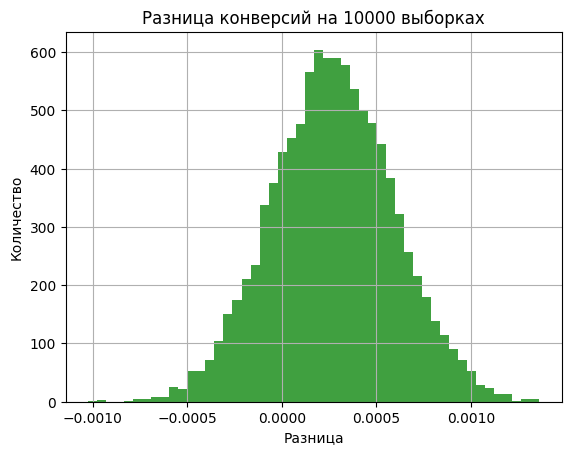

In [52]:
plt.hist(x=conversion_diffs, bins=50, facecolor='g', alpha=0.75)
plt.grid(True)
plt.xlabel('–†–∞–∑–Ω–∏—Ü–∞')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.title('–†–∞–∑–Ω–∏—Ü–∞ –∫–æ–Ω–≤–µ—Ä—Å–∏–π –Ω–∞ 10000 –≤—ã–±–æ—Ä–∫–∞—Ö');

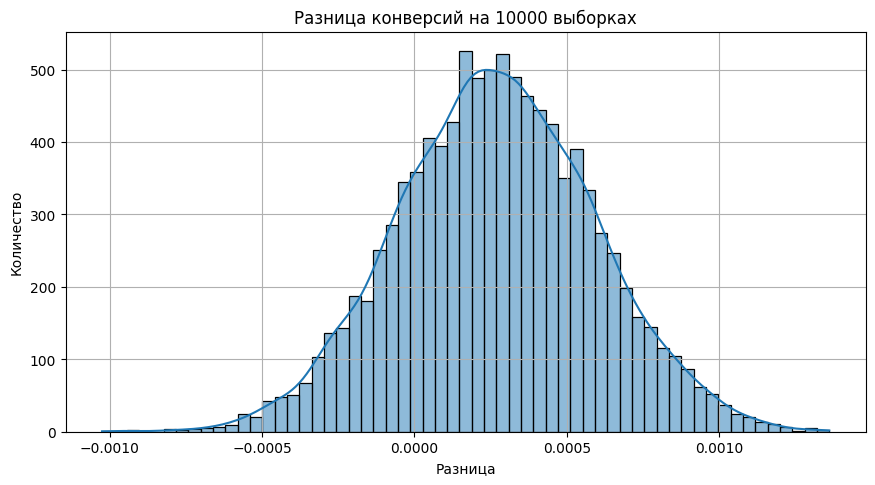

In [24]:
fig = plt.figure(figsize=[8, 4])
ax = fig.add_axes([1, 1, 1, 1])
sns.histplot(
    data=conversion_diffs,
    kde=True,
    ax=ax
)

ax.set_title('–†–∞–∑–Ω–∏—Ü–∞ –∫–æ–Ω–≤–µ—Ä—Å–∏–π –Ω–∞ 10000 –≤—ã–±–æ—Ä–∫–∞—Ö')
ax.set_xlabel('–†–∞–∑–Ω–∏—Ü–∞')
ax.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
ax.grid(True);

## –í—ã–≤–æ–¥

**- –ò–∑–º–µ–Ω–µ–Ω–∏–µ –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø–µ –í —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –∑–Ω–∞—á–∏–º–æ. –†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –æ—Å—Ç–∞—Ç—å—Å—è –Ω–∞ —Ç–µ–∫—É—â–µ–π –≤–µ—Ä—Å–∏–∏ –ø—Ä–æ–¥—É–∫—Ç–∞ (–≥—Ä—É–ø–ø–∞ –ê).**